# Pixel-based feature analysis and visualization
**Input:**  

Feature image (44 bands),

Labeled ground truth (7 classes)

**Output:**  

Visualization plots of pixel density for each feature band

In [1]:
# import required packages
from scipy.io import  loadmat
import scipy.io as sio
import skimage.io
import time
import cv2

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

In [2]:
input_img = r"data/features.tif" # Input image path
input_label = r"data/label.tif" # Input label path
# Transform image to array
image = np.array(skimage.io.imread(input_img))
# Get total bands
n_ch = image.shape[0]
## Transform label image to array
label = np.array(skimage.io.imread(input_label))

## Read the data.
dataset = image 
ground_truth = label
print("Dataset size:{}".format(dataset.shape)) # print out dataset size
print("Ground truth size:{}".format(ground_truth.shape)) # print out label size

Dataset size:(40, 2220, 1412)
Ground truth size:(2220, 1412)


In [3]:
# Function: plot the image of random band
def plot_band(dataset, ground_truth):
    # plot random feature bands
    plt.figure(figsize=(10, 6)) # set figure size
    band_no = np.random.randint(dataset.shape[0]) # generate random band
    plt.subplot(1,2,1)
    plt.imshow(dataset[band_no,:,:], cmap='jet') # show the band image
    plt.title(f'Band-{band_no}', fontsize=14) # set title
    plt.axis('off') # close axis
    plt.colorbar() # show legend
    
    # plot ground truth labels
    plt.subplot(1,2,2) # close the color 
    plt.imshow(ground_truth, cmap='YlGn') # show image
    plt.title('Ground truth', fontsize=14) # set title
    plt.axis('off') # close axis
    plt.colorbar(ticks= range(0,8)) # set ticks
    
    plt.show() # show figure

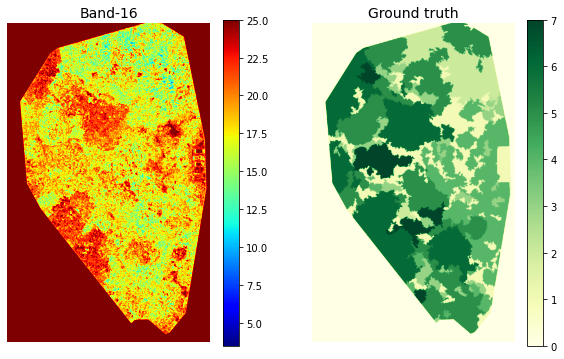

In [4]:
plot_band(dataset, ground_truth) # show image of random band

In [26]:
## Save image to dataset
from tqdm import tqdm
import pandas as pd
# Function: Extract pixe-based features and transform to dateset
def extract_pixels(dataset, ground_truth):
    df = pd.DataFrame()
    for i in tqdm(range(dataset.shape[0])):
        df = pd.concat([df, pd.DataFrame(dataset[i, :, :].ravel())], axis=1)
    df = pd.concat([df, pd.DataFrame(ground_truth.ravel())], axis=1)
    df.columns = [f'band-{i}' for i in range(1, 1+dataset.shape[0])]+['class']
    return df

In [93]:
df = extract_pixels(dataset, ground_truth)# extract pixel feature values to dataframe

100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:08<00:00,  4.49it/s]


In [28]:
df.head() # Show the first five rows

,band-1,band-2,band-3,band-4,band-5,band-6,band-7,band-8,band-9,band-10,...,band-32,band-33,band-34,band-35,band-36,band-37,band-38,band-39,band-40,class
0,0.0,0.0,0.0,25.0,0.0,25.0,25.0,0.0,0.0,625.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.0,0
1,0.0,0.0,0.0,25.0,0.0,25.0,25.0,0.0,0.0,625.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.0,0
2,0.0,0.0,0.0,25.0,0.0,25.0,25.0,0.0,0.0,625.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.0,0
3,0.0,0.0,0.0,25.0,0.0,25.0,25.0,0.0,0.0,625.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.0,0
4,0.0,0.0,0.0,25.0,0.0,25.0,25.0,0.0,0.0,625.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.0,0


In [30]:
# save dataset to csv
# estimated time: 100 secs
start_time = time.time() # start time
print('Start download pixel-based feature dataset...\n')

df.to_csv('results/pixel_data.csv', index=False) # save data table to .csv file

end_time = time.time() # end time
print('Sucessfully save dataset!') # print end time
print('Using',end_time-start_time,'seconds.') # print cost of time

Start download pixel-based feature dataset...

Sucessfully save dataset!
Using 100.08482885360718 seconds.


In [50]:
import pandas as pd
# Function: plot pixel density signature
def plot_signature(df):
    plt.figure(figsize=(8, 4)) # set figure size
    pixel_no = np.random.randint(df.shape[0]) # randomly choose pixel no.
    # plot feature value variations of the pixel
    plt.plot(range(0,n_ch), df.iloc[pixel_no, :-1].values.tolist(), color='dimgray', label= f'Class - {df.iloc[pixel_no, -1]}')  

    plt.title(f'Pixel({pixel_no}) signature', fontsize=14) # add title
    plt.xlabel('Band Number', fontsize=14) # set xlabel
    plt.ylabel('Pixel Intensity', fontsize=14) # set ylabel
    plt.show() # show image

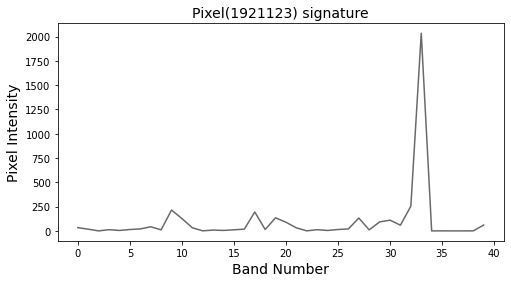

In [51]:
plot_signature(df)

In [52]:
df.head()

,band-1,band-2,band-3,band-4,band-5,band-6,band-7,band-8,band-9,band-10,...,band-32,band-33,band-34,band-35,band-36,band-37,band-38,band-39,band-40,class
0,0.0,0.0,0.0,25.0,0.0,25.0,25.0,0.0,0.0,625.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.0,0
1,0.0,0.0,0.0,25.0,0.0,25.0,25.0,0.0,0.0,625.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.0,0
2,0.0,0.0,0.0,25.0,0.0,25.0,25.0,0.0,0.0,625.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.0,0
3,0.0,0.0,0.0,25.0,0.0,25.0,25.0,0.0,0.0,625.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.0,0
4,0.0,0.0,0.0,25.0,0.0,25.0,25.0,0.0,0.0,625.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.0,0


In [53]:
print(f'Shape of the data: {df.shape}')

Shape of the data: (3134640, 41)


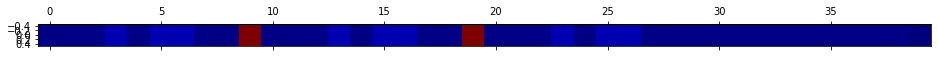

In [56]:
plt.matshow(df.iloc[1, :-1].values.reshape(1,n_ch), cmap='jet');

In [57]:

from mpl_toolkits.axes_grid1 import make_axes_locatable
def plot_pixel(pixel, n):
    ax = plt.gca()
    im = ax.imshow(pixel.reshape(4, 10), cmap = 'jet')
    plt.title(f'pixel - {n}')
    plt.axis('off')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)
    plt.show()

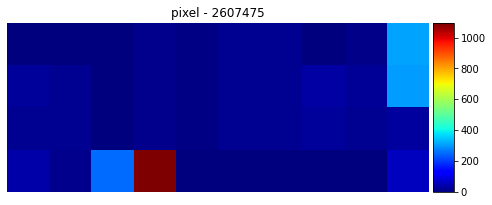

In [58]:
plt.figure(figsize=(8, 4))

rand_n = np.random.randint(df.shape[0])

plot_pixel(df.iloc[rand_n, :-1].values, rand_n)

In [59]:
X = df.iloc[:, :-1].values

y = df.iloc[:, -1].values

X.shape, y.shape

((3134640, 40), (3134640,))

In [60]:
print(f'Shape of the data: {df.shape}')
print(f"Unique Class Labels: {df.loc[:, 'class'].unique()}")
df.loc[:, 'class'].value_counts()

Shape of the data: (3134640, 41)
Unique Class Labels: [0 5 2 6 3 7 1 4]


0    1136270
5     515031
6     465781
4     335549
1     263292
2     175551
3     127667
7     115499
Name: class, dtype: int64

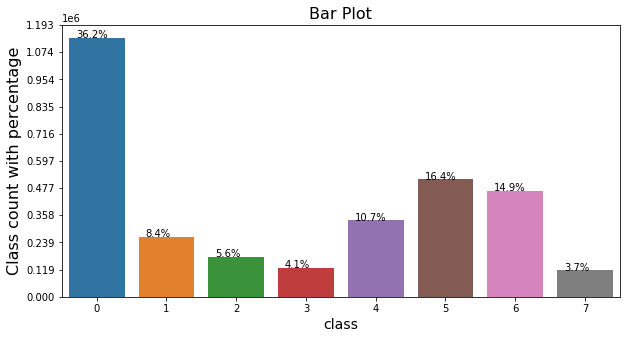

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import ticker
plt.figure(figsize=(10, 5))

ax = sns.countplot(x='class', data=df[['class']])

for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/df.shape[0]), (p.get_x()+0.1, p.get_height()+5))
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

plt.ylabel('Class count with percentage', fontsize=16)

plt.xlabel('class', fontsize=14)

plt.title('Bar Plot', fontsize=16)

plt.show()

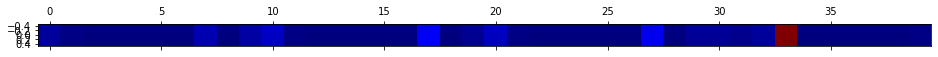

In [20]:
# Visualizing the pixel
plt.matshow(df.iloc[1, :-1].values.reshape(1,40), cmap='jet');

Enter the band Number(1-40) :10


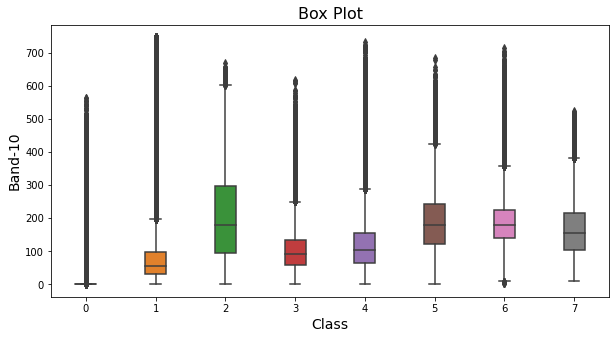

In [77]:
plt.figure(figsize=(10, 5))
n = int(input('Enter the band Number(1-40) :'))
sns.boxplot( x=df["class"], y=df["band-1"], width=0.3);
plt.title('Box Plot', fontsize= 16)
plt.xlabel('Class', fontsize= 14)
plt.ylabel(f'Band-{n}', fontsize= 14)
plt.show()

In [70]:
print(f"Details of Band - {n}: \n\n{df['band-'+str(n)].describe()}")

Details of Band - 20: 

count    3.134640e+06
mean     3.290394e+02
std      2.409889e+02
min      2.700000e+01
25%      1.030000e+02
50%      2.130000e+02
75%      6.250000e+02
max      6.250000e+02
Name: band-20, dtype: float64


D:\Program Files\ArcGIS\Pro\bin\Python\envs\ge5219\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


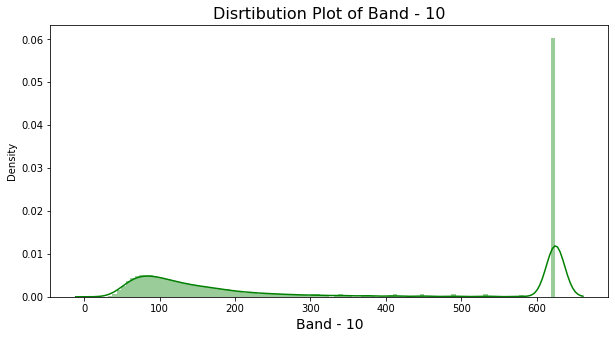

In [78]:
plt.figure(figsize=(10, 5))
sns.distplot(df['band-'+str(n)], color='Green', bins=100, hist_kws={'alpha': 0.4});
plt.xlabel('Band - '+str(n), fontsize=14)
plt.title('Disrtibution Plot of Band - '+str(n), fontsize=16)
plt.show()

In [80]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

#import hvplot
#import hvplot.pandas

#pd.options.plotting.backend = 'hvplot'


In [95]:
# Load dataset
df = pd.read_csv('Dataset0402.csv')

df.replace([np.inf, -np.inf], np.nan)
df=df.fillna(0)
df.dropna(inplace=True)

#df = np.nan_to_num(df)
X = df.iloc[:, :-1].values
X = np.nan_to_num(X)
y = df.iloc[:, -1].values
y= np.nan_to_num(y)
print('If nan exists:',np.isnan(X).any())
print('If inf exists:',np.isinf(X).any()) 
print('If nan exists:',np.isnan(y).any())
print('If inf exists:',np.isinf(y).any()) 

If nan exists: False
If inf exists: False
If nan exists: False
If inf exists: False


In [ ]:

pca = PCA(n_components = 20)

principalComponents = pca.fit_transform(X)

ev1=pca.explained_variance_ratio_


plt.plot(np.cumsum(ev1))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

No handles with labels found to put in legend.


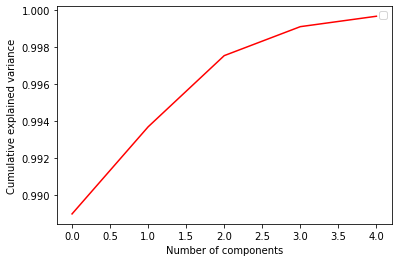

In [98]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
LDA_m = LDA(n_components=5)
X_r2= LDA_m.fit(X,y).transform(X)
ev2=LDA_m.explained_variance_ratio_

plt.plot(np.cumsum(ev2),'r')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [ ]:
print(X.shape)# print data shape
print(y.shape)

In [ ]:
# Deivide training dataset and test dataset
X_train, X_test, y_train, y_test, indices_train, indices_test  = train_test_split(principalComponents, 
                                                                                  y,  range(X.shape[0]), 
                                                                                  test_size = 0.25, random_state = 11)
X_train.shape, X_test.shape

In [ ]:
start_time=time.time()

svm = SVC(kernel='rbf', degree = 10, gamma='scale', cache_size=1024*7)
svm.fit(X_train, y_train)
end_time = time.time()
print('Training SVM costs',end_time-start_time,'seconds.')

In [220]:
# print svm cost
start_time=time.time()
y_pred = svm.predict(X_test)
end_time = time.time()
print('Testing SVM costs',end_time-start_time,'seconds.')

Testing SVM costs 1972.5184917449951 seconds.


In [216]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(f'Accuracy: {accuracy_score(y_test, y_pred)}%')

Accuracy: 0.560995876161753%


# confusion matrix

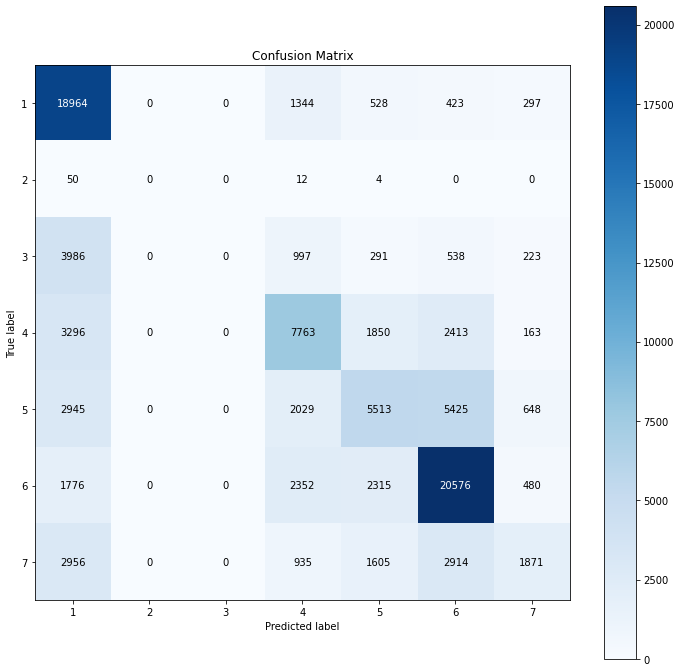

In [168]:
# ! pip install -q scikit-plot

import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred,
    figsize=(6,6));

In [219]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# !pip install plotly
print('SVM Classification report(gmma=0.01):\n',classification_report(y_test,  y_pred))

SVM Classification report(gmma=0.01):
               precision    recall  f1-score   support

           1       0.56      0.88      0.68     21556
           2       0.00      0.00      0.00        66
           3       0.00      0.00      0.00      6035
           4       0.50      0.50      0.50     15485
           5       0.46      0.33      0.38     16560
           6       0.64      0.75      0.69     27499
           7       0.51      0.18      0.27     10281

    accuracy                           0.56     97482
   macro avg       0.38      0.38      0.36     97482
weighted avg       0.51      0.56      0.52     97482



D:\Program Files\ArcGIS\Pro\bin\Python\envs\ge5219\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Program Files\ArcGIS\Pro\bin\Python\envs\ge5219\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Program Files\ArcGIS\Pro\bin\Python\envs\ge5219\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m